In [1]:
from training_functions import *
from merging import *
from utils import *
from model_evaluation import ModelEvaluation


2024-10-24 14:34:41.719927: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 14:34:41.721441: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 14:34:41.751076: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 14:34:41.752061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 14:34:42.388363: W tensorflow/compiler/tf2t

In [2]:
df_kahle_plane, df_mpdb_plane, df_exp_plane = get_featurizers_datasets()

SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3
ape_features
bc_features
bf_features
co_features
density_features
ee_features
end_features
gsf_features
jcfid_features
md_features
mpe_features
ofm_features
os_features
sc_features
scm_features
sh_features
vo_features
xrd_features_pattern_length-20
yss_features
SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3
ape_features
bc_features
bf_features
co_features
density_features
ee_features
end_features
gsf_features
jcfid_features
md_features
mpe_features
ofm_features
os_features
sc_features
scm_features
sh_features
vo_features
xrd_features_pattern_length-20
yss_features
SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3
ape_features
bc_features
bf_features
co_features
density_features
ee_features
end_features
gsf_features
jcfid_features
md_features
mpe_features
ofm_features
os_features
sc_features
scm_features
sh_features
vo_features
xrd_features_pattern_length-20
yss_features


In [3]:
df_kahle_plane = df_kahle_plane.sort_values(by = 'stru_id')

In [4]:
X_mpdb = df_mpdb_plane.drop([ 
     'formula_pretty',
     'material_id', 
 ], axis=1)

X_kahle = df_kahle_plane.drop([ 
    'stru_label',
     'stru_id', 
 ], axis=1)

X_exp = df_exp_plane.drop([ 
    'material_id',
     'sample_weight', 
     'icsd'
 ], axis=1)

assert X_mpdb.shape[1] == X_kahle.shape[1] == X_exp.shape[1]


column_names = X_kahle.columns.tolist()
column_names = np.array(column_names)[~np.all(X_kahle.to_numpy() == 0, axis=0)]

cnt_and_name_features_kahle = {}
for feature_name in column_names:
    name = '_'.join(feature_name.split('_')[1:])
    if name not in cnt_and_name_features_kahle:
        cnt_and_name_features_kahle[name] = 0
    cnt_and_name_features_kahle[name] = cnt_and_name_features_kahle[name] + 1
    
# X_kahle = X_kahle.to_numpy()
# X_mpdb = X_mpdb.to_numpy()
# X_exp = X_exp.to_numpy()

# X_mpdb = X_mpdb[:, ~np.all(X_kahle == 0, axis=0)]
# X_exp = X_exp[:, ~np.all(X_kahle == 0, axis=0)]
# X_kahle = X_kahle[:, ~np.all(X_kahle == 0, axis=0)]


feature_weights = [1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in column_names]
feature_names = np.array(list(map(lambda x: x.split('_')[0] + '_' + featurizers_mapping['_'.join(x.split('_')[1:])], column_names)))

In [26]:
df_Kahle2020 = augment_Kahle2020.read_and_augment(
    "data_slim.csv",
)

Estimating lognorm D parameters


Making initial guess:   0%|          | 0/195 [00:00<?, ?it/s]

refining:   0%|          | 0/1000 [00:00<?, ?it/s]

In [28]:
df_Kahle2020 = df_Kahle2020[df_Kahle2020['temperature'] == 1000]

In [5]:
from misc_utils import augment_Kahle2020, augment_preds

df_Kahle2020 = augment_Kahle2020.read_and_augment(
    "data_slim.csv",
)

data_Kahle2020 = augment_preds.get_data_Kahle2020(
    df_preds=pd.read_csv("datasets/exported.predictions.Kahle2020.v2.csv"),
    df_data=df_Kahle2020,
)

data_Kahle2020 = data_Kahle2020.sort_values(by = 'src_id')

Estimating lognorm D parameters


Making initial guess:   0%|          | 0/195 [00:00<?, ?it/s]

refining:   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
featurizers_mapping = {
    'SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3': 'SOAP',
}

In [7]:
# featurizers_mapping = {
#     'ape_features': 'AtomicPackingEfficiency',
#     'bc_features': 'BandCenter',
#     'bf_features': 'BondFractions',
#     'co_features': 'ChemicalOrdering',
#     'density_features': 'DensityFeatures',
#     'ee_features': 'EwaldEnergy',
#     'jcfid_features': 'JarvisCFID',
#     'gsf_features': 'GaussianSymmFunc',
#     'md_features': 'Meredig',
#     'mpe_features': 'MaximumPackingEfficiency',
#     'ofm_features': 'OrbitalFieldMatrix',
#     'os_features': 'OxidationStates',
#     'sc_features': 'StructuralComplexity',
#     'scm_features': 'SineCoulombMatrix',
#     'sh_features': 'StructuralHeterogeneity',
#     'vo_features': 'ValenceOrbital',
#     'xrd_features_pattern_length-20': 'XRDPowderPattern',
#     'SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3': 'SOAP',
#     'yss_features': 'YangSolidSolution'
# }

In [8]:
from misc_utils import augment_Kahle2020
from misc_utils import augment_preds

df_Kahle2020 = augment_Kahle2020.read_and_augment(
    "data_slim.csv",
)

preds_Kahle2020 = augment_preds.join_data_and_preds_Kahle2020(
    df_preds=pd.read_csv("datasets/exported.predictions.Kahle2020.v2.csv"),
    df_data=df_Kahle2020,
)

preds_mp = pd.read_csv("datasets/exported.predictions.mp.v2.csv")
ref_mp = pd.read_csv("datasets/mp_Laskowski2023_map.csv")

preds_mp_exp = join_data_and_preds_exp(
    df_preds_full_mp=preds_mp,
    df_data_exp_mp=ref_mp,
)

preds_icsd_exp = join_data_and_preds_icsd(
    df_preds_icsd=pd.read_csv("datasets/exported.predictions.icsd.v3.csv"),
    df_data_exp_full=pd.read_csv("datasets/digitized_data_for_SSEs.csv"),
)

preds_mp_exp = pd.concat([preds_mp_exp, preds_icsd_exp], axis=0).reset_index(drop=True)

all_features = get_features_meta_info(masking_options=("",))


sigmoid = lambda x, steepness=10: 1.0 / (1.0 + np.exp(-x * steepness))

[preds_Kahle2020, preds_mp_exp], all_features = add_feature(
    [preds_Kahle2020, preds_mp_exp],
    all_features,
    func=lambda x: (
        sigmoid(np.log10(x["fv_0p5_connected_union"]) + 2.00)
        * sigmoid(np.log10(x["fv_0p5_disconnected_union"]) + 1.15)
    ),
    name="manual_combination",
    type="manual_combination",
    level=0.0,
)

[preds_Kahle2020, preds_mp_exp], all_features = add_feature(
    [preds_Kahle2020, preds_mp_exp],
    all_features,
    func=lambda x: (
        np.random.default_rng(42).uniform(0.01, 1.0, size=len(x))
    ),
    name="random_guess",
    type="random_guess",
    level=0.0,
)

Estimating lognorm D parameters


Making initial guess:   0%|          | 0/195 [00:00<?, ?it/s]

refining:   0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
np.argsort(df_Kahle2020['src_id'].to_list())

array([ 29,  74,  35,  25,  95,  64,  36, 112, 101,  70, 110,  90,  19,
        63,   8,  98,  45,  85,  13,  65, 102,  34, 108,  50,  99,   7,
        15,  33,  60,   9,  26,  87,  88,  27, 109,  78,   6, 105,   1,
        17,  24,  72,  23,  97,  46,  28,  38,   5,   2,  68,  21, 115,
       107,  59,  12,  32,  31,  84,  53,  94,  54,  71,  58,  83,  96,
        22,  77, 100,  18, 113,  37,  44,  39,  14,  55,  61, 106,  48,
        89,  11, 114,   0,  93,  67,  20,  10, 104,  62, 111,  47, 103,
        40,  82,  43,  86,  30,   4,  81,  49,  41,  69,  75,  80,  73,
        92,   3,  51,  57,  42,  66,  16,  52,  56,  79,  76,  91])

In [33]:
np.load('x_kahle_chosen_before_scaling.npy')[np.argsort(df_Kahle2020['src_id'].to_list())]

array([[ 0.02547653, -0.08149053,  0.35681044, ...,  0.91778024,
        -1.31200867,  1.91975265],
       [ 0.03803696, -0.13297063,  0.54466525, ...,  0.23760803,
        -0.34718931,  0.56550703],
       [ 0.0383749 , -0.12802499,  0.54493375, ...,  0.89659707,
        -1.38326949,  2.24811935],
       ...,
       [ 0.0895707 , -0.29457653,  1.27199171, ...,  0.70945838,
        -0.95076578,  1.4054263 ],
       [ 0.04606207, -0.17674999,  0.6702765 , ...,  1.22726014,
        -1.5690168 ,  2.14303401],
       [ 0.03468841, -0.11412443,  0.49099069, ...,  1.93293798,
        -2.54370497,  3.54608788]])

In [10]:
data_Kahle2020['src_id']

0           -1
1         4155
2         4317
3        20032
4        23621
        ...   
111    8101456
112    9000368
113    9007831
114    9007843
115    9014879
Name: src_id, Length: 116, dtype: int64

In [35]:
def matcher(column_name, featurizer_name):
    if featurizer_name in column_name:
        return True
    return False

params = {
    "max_iter": 100
}

import warnings
warnings.filterwarnings("ignore")

for featurizer_name, value in featurizers_mapping.items():
    print(featurizer_name)
    columns = [matcher(column_name, featurizer_name) for column_name in column_names]
    chosen_columns = np.array(column_names)[columns].tolist()
    X_kahle_chosen = X_kahle[chosen_columns].to_numpy()
    X_mpdb_chosen = X_mpdb[chosen_columns].to_numpy()
    X_exp_chosen = X_exp[chosen_columns].to_numpy()
    # for i in range(160):
    #     print(set(X_kahle_chosen[:, 0]) == set(np.load('x_kahle_chosen_before_scaling.npy')[:, 0]))

    X_mpdb_chosen = X_mpdb_chosen[:, ~np.all(X_kahle_chosen == 0, axis=0)]
    X_exp_chosen = X_exp_chosen[:, ~np.all(X_kahle_chosen == 0, axis=0)]
    X_kahle_chosen = X_kahle_chosen[:, ~np.all(X_kahle_chosen == 0, axis=0)]

    scaler = StandardScaler()

    X_mpdb_chosen = scaler.fit_transform(X_mpdb_chosen)
    X_exp_chosen = scaler.transform(X_exp_chosen)
    X_kahle_chosen = scaler.transform(X_kahle_chosen)

    print(np.all(X_kahle_chosen == np.load('x_kahle_chosen_after_scaling.npy')[[np.argsort(df_Kahle2020['src_id'].to_list())]]))

    # pipeline_logreg = ModelEvaluation(data_Kahle2020, model_name = 'logreg', params = params)    
    # pipeline_logreg.fit(X_kahle_chosen, np.ones(X_kahle_chosen.shape[1]), thr_positive = 1e-1, thr_negative = 1e-2, threshold = 1e-2, feature_names = chosen_columns)
    # pipeline_logreg.evaluate_with_cv(num_of_evaluations = 1, X_mpdb = X_mpdb_chosen, X_exp = X_exp_chosen, random_splits = [0])
    # pipeline_logreg.get_aggregated_statistics()
    # print(pipeline_logreg.show_results())

    # preds_logreg_kahle = pipeline_logreg.preds_kahle_averaged[0]

    # np.save('preds_logreg_kahle_zews.npy', preds_logreg_kahle)
    
    # preds_logreg_mpdb = pipeline_logreg.preds_mpdb_averaged[-1]
    # preds_logreg_exp = pipeline_logreg.preds_exp_averaged[-1]

    # [preds_Kahle2020, preds_mp_exp], all_features = add_feature_np(
    # [preds_Kahle2020, preds_mp_exp],
    # all_features,
    # values = [preds_logreg_kahle, preds_logreg_exp],
    # name = value,
    # type = value,
    # level=0.0,
    # )    
    # np.save(f'predictions_final_single_featurizers/{featurizer_name}_logreg_l1_kahle.npy', pipeline_logreg.preds_kahle_averaged[-1])
    # np.save(f'predictions_final_single_featurizers/{featurizer_name}_logreg_l1_mpdb.npy', pipeline_logreg.preds_mpdb_averaged[-1])
    # np.save(f'predictions_final_single_featurizers/{featurizer_name}_logreg_l1_exp.npy', pipeline_logreg.preds_exp_averaged[-1])
    

SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3
True


In [23]:
X_kahle_chosen

array([[-1.14928675,  1.10612432, -1.14606698, ...,  0.26062593,
        -0.36631471,  0.39426349],
       [-0.6073979 ,  0.59051834, -0.60250757, ..., -0.84709895,
         0.82984504, -0.8055443 ],
       [-0.59281859,  0.64005212, -0.60173066, ...,  0.22612713,
        -0.45466216,  0.68518334],
       ...,
       [ 1.61589788, -1.02806741,  1.50201756, ..., -0.07864595,
         0.0815455 , -0.06140921],
       [-0.2611744 ,  0.15204026, -0.23905037, ...,  0.76464327,
        -0.68494719,  0.59208191],
       [-0.75186276,  0.77927502, -0.75781535, ...,  1.91390648,
        -1.89334206,  1.83513186]])

In [25]:
data_Kahle2020['src_id'].to_list()

[-1,
 4155,
 4317,
 20032,
 23621,
 28526,
 33864,
 33953,
 34003,
 34079,
 34361,
 39761,
 40247,
 49022,
 50612,
 60774,
 60850,
 60935,
 61199,
 61218,
 61337,
 61338,
 62137,
 65260,
 67234,
 67236,
 69300,
 73124,
 73275,
 74950,
 75031,
 75071,
 75164,
 75516,
 83831,
 86184,
 87991,
 92468,
 153620,
 167518,
 174443,
 174533,
 182033,
 187751,
 188009,
 193803,
 245975,
 245978,
 245988,
 246277,
 280992,
 291512,
 405777,
 416888,
 419852,
 421083,
 424281,
 424352,
 425174,
 426103,
 428002,
 642182,
 1004054,
 1008009,
 1008693,
 1100060,
 1501470,
 1510140,
 1510224,
 1510745,
 1510933,
 1511474,
 1511740,
 1528861,
 1530096,
 1530934,
 1532734,
 1535227,
 1535645,
 1535987,
 1536985,
 1537475,
 1539516,
 1544389,
 2000944,
 2003027,
 2005920,
 2007413,
 2012178,
 2014117,
 2019177,
 2020217,
 2208797,
 2218562,
 2220995,
 2242045,
 2310701,
 4002768,
 4306193,
 4321118,
 4329224,
 4329225,
 4330276,
 4337786,
 4337787,
 7024042,
 7031897,
 7035178,
 7213712,
 7222190,
 7224

In [18]:
np.sort(np.load('preds_logreg_kahle.npy')) * 116

array([0.01796983, 0.01853231, 0.03119941, 0.03278726, 0.0350974 ,
       0.04713513, 0.05042901, 0.05156128, 0.06009875, 0.06538423,
       0.0666809 , 0.07097098, 0.07869728, 0.08007553, 0.08271982,
       0.08793261, 0.08850266, 0.08912871, 0.09009988, 0.09689964,
       0.10094136, 0.10537428, 0.10696246, 0.1120694 , 0.11375122,
       0.11731644, 0.12064995, 0.13505974, 0.14044234, 0.14698301,
       0.15354013, 0.16444439, 0.16483172, 0.1679003 , 0.16807015,
       0.16828003, 0.17029647, 0.17762049, 0.18080608, 0.1813083 ,
       0.18206689, 0.18310481, 0.1860303 , 0.19576135, 0.19647067,
       0.19931516, 0.19973769, 0.20547927, 0.20698426, 0.21728034,
       0.22568497, 0.23147793, 0.23485387, 0.24638355, 0.24660772,
       0.24963555, 0.25005123, 0.25379805, 0.25772239, 0.26364944,
       0.2834118 , 0.28408271, 0.28426691, 0.29420336, 0.31200397,
       0.31633432, 0.32016092, 0.32310218, 0.32743294, 0.33002548,
       0.33299376, 0.34139532, 0.34502201, 0.35822009, 0.35890

In [16]:
np.sort(np.load('preds_logreg_kahle_zews.npy'))

array([0.00121686, 0.00140152, 0.00148875, 0.00642544, 0.00712596,
       0.02067928, 0.02113102, 0.0230814 , 0.02781726, 0.02991916,
       0.036463  , 0.03731133, 0.0379043 , 0.04553696, 0.05172673,
       0.05309288, 0.06166984, 0.06438093, 0.06631456, 0.06850183,
       0.0702745 , 0.07189618, 0.07847285, 0.08023532, 0.08064442,
       0.08506761, 0.08920729, 0.09614257, 0.10026816, 0.10049853,
       0.10420999, 0.10659754, 0.10836052, 0.1095547 , 0.11000829,
       0.11661333, 0.11856367, 0.12908346, 0.13002559, 0.13795545,
       0.13862991, 0.14046229, 0.14142493, 0.14365163, 0.14573324,
       0.15050407, 0.15773611, 0.16133902, 0.19727523, 0.20278396,
       0.20942818, 0.23854814, 0.24333652, 0.24561141, 0.24656327,
       0.24883776, 0.25660574, 0.25862363, 0.26249258, 0.26255949,
       0.29317063, 0.29352879, 0.29935746, 0.30067173, 0.30415444,
       0.30422494, 0.31013879, 0.31402652, 0.3575783 , 0.3604554 ,
       0.38272081, 0.40025059, 0.40040831, 0.4158156 , 0.42594

In [12]:
features = all_features.index.to_list()
features = [word for word in features if word.lower().startswith('barrier') == True or word.lower().startswith('fv') == True]
all_features = all_features.drop(index = features)

exp_pos = preds_mp_exp.query(
    "sigma_S_cm.replace('<1E-10', '1e-10').astype('float') >= 5e-5"
)["sample_weight"].sum()
exp_neg = preds_mp_exp.query(
    "sigma_S_cm.replace('<1E-10', '1e-10').astype('float') <= 1e-5"
)["sample_weight"].sum()


sim_pos = len(preds_Kahle2020.query("log10condNE300 >= -2.5"))
sim_pos_base = len(preds_Kahle2020.query("condNE1000 >= 0.1"))
sim_neg = len(preds_Kahle2020.query("condNE1000 <= 1e-2"))

print(f"exp          p/n: {exp_pos:.0f} / {exp_neg:.0f} = {exp_pos / exp_neg:.3f}")
print(f"sim (base)   p/n: {sim_pos_base:.0f} / {sim_neg:.0f} = {sim_pos_base / sim_neg:.3f}")
print(f"sim (extrap) p/n: {sim_pos:.0f} / {sim_neg:.0f} = {sim_pos / sim_neg:.3f}")


roclike_metrics = ROClikeComparisonMetrics()

feature_scores_experimental = roclike_metrics.eval_features(
    preds_df=preds_mp_exp,
    features_meta_info=all_features,
    positive_thr=5e-5,
    negative_thr=1e-5,
    weight_validation_plots=False,
    dataset_type="experimental",
    experimental_error_relative=1.0,
    num_bootstrap_samples=1000,
    num_negatives_max=0.1 * exp_neg,
)

feature_scores_base = roclike_metrics.eval_features(
    preds_df=preds_Kahle2020,
    features_meta_info=all_features,
    num_bootstrap_samples=1000,
    num_negatives_max=0.1 * sim_neg,
    positive_on_extrap300=False,
    weight_validation_plots=False,
)

feature_scores_extrap300 = roclike_metrics.eval_features(
    preds_df=preds_Kahle2020,
    features_meta_info=all_features,
    num_bootstrap_samples=1000,
    # num_negatives_max=2.0,
    num_negatives_max=0.1 * sim_neg,
    positive_on_extrap300=True,
    positive_thr=-2.5,
    weight_validation_plots=False,
)


exp          p/n: 6 / 76 = 0.079
sim (base)   p/n: 31 / 64 = 0.484
sim (extrap) p/n: 4 / 64 = 0.062
Found sample weights!


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
label_map = dict(zip(all_features.index.to_list(), all_features.index.to_list()))

KeyError: 'SOAP'

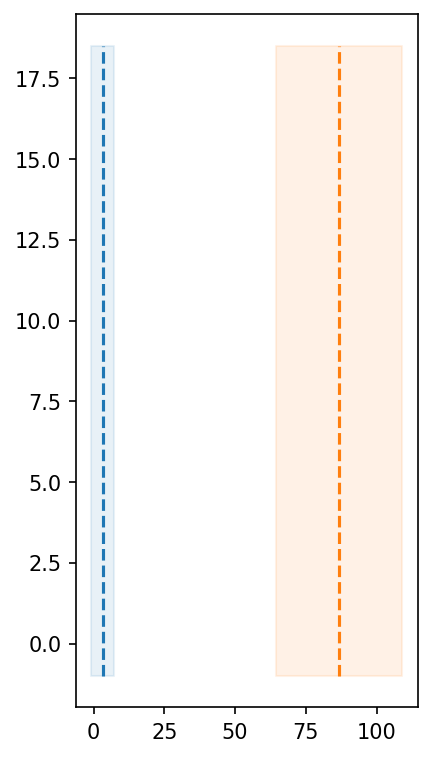

In [14]:
fig = plt.figure(figsize=(10, 6), dpi=150)

for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
    ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
    ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
    ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
], 1):
    plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
    plt.subplots_adjust(hspace=0.0)
    groups = {t: g for t, g in all_features.groupby("type")}

    for t in ["random_guess", "manual_combination"]:
        g = groups[t]
        yval = score_vals.loc[g.index].iloc[0]
        yerr = score_errs.loc[g.index].iloc[0]
        (l,) = plt.plot([yval] * 2, [-1.0, 18.5], '--', label=label_map[t])
        plt.fill_betweenx([-1.0, 18.5], [yval + yerr] * 2, [yval - yerr] * 2, color=l.get_color(), alpha=0.1)
        
    for t in featurizers_mapping.values():
        g = groups[t]
        plt.errorbar(
                score_vals[g.index].iloc[0], g["level"].index[0], xerr=score_errs.loc[g.index].iloc[0],
                fmt="o", capsize=2.0, alpha=0.8, ms=4.0,
            )

    if i_plt == 1:
        handles, labels = plt.gca().get_legend_handles_labels()
        lh_dict = {l: h for l, h in zip(labels, handles)}
        plt.legend(handles, labels, fontsize=6)
    else:
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
    plt.xlabel(score_type, fontsize=8)
fig.tight_layout()
plt.show()

In [ ]:
aaaaaaaaaaaaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaaaaaaaaaaaa' is not defined

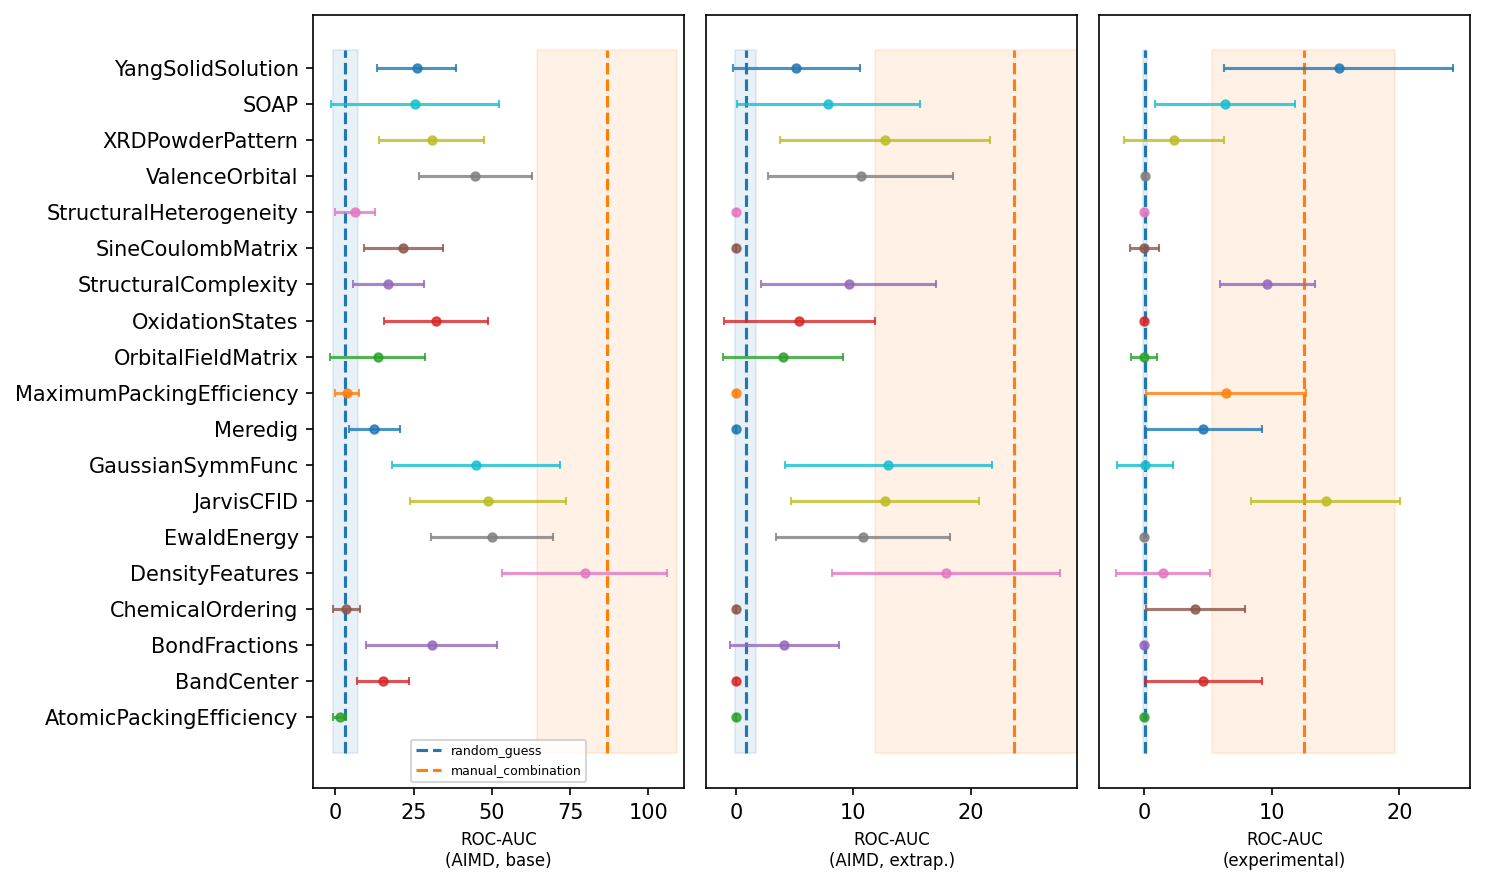

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi=150)

for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
    ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
    ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
    ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
], 1):
    plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
    plt.subplots_adjust(hspace=0.0)
    groups = {t: g for t, g in all_features.groupby("type")}

    for t in ["random_guess", "manual_combination"]:
        g = groups[t]
        yval = score_vals.loc[g.index].iloc[0]
        yerr = score_errs.loc[g.index].iloc[0]
        (l,) = plt.plot([yval] * 2, [-1.0, 18.5], '--', label=label_map[t])
        plt.fill_betweenx([-1.0, 18.5], [yval + yerr] * 2, [yval - yerr] * 2, color=l.get_color(), alpha=0.1)
        
    for t in featurizers_mapping.values():
        g = groups[t]
        plt.errorbar(
                score_vals[g.index].iloc[0], g["level"].index[0], xerr=score_errs.loc[g.index].iloc[0],
                fmt="o", capsize=2.0, alpha=0.8, ms=4.0,
            )

    if i_plt == 1:
        handles, labels = plt.gca().get_legend_handles_labels()
        lh_dict = {l: h for l, h in zip(labels, handles)}
        plt.legend(handles, labels, fontsize=6)
    else:
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
    plt.xlabel(score_type, fontsize=8)
fig.tight_layout()
plt.show()

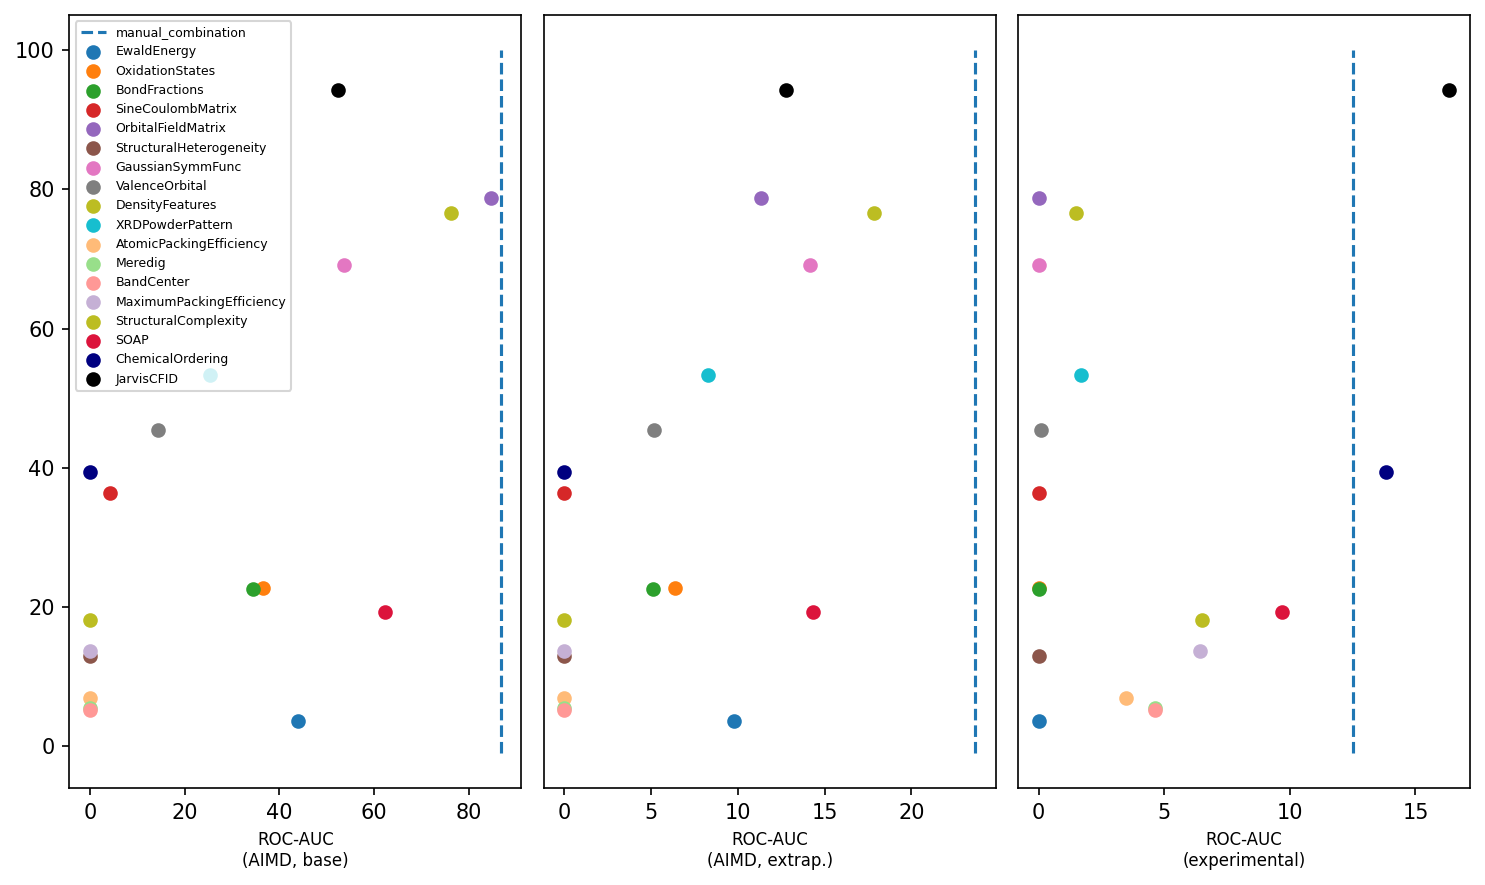

In [ ]:
# colors = [
#     "#1f77b4",  # Blue
#     "#ff7f0e",  # Orange
#     "#2ca02c",  # Green
#     "#d62728",  # Red
#     "#9467bd",  # Purple
#     "#8c564b",  # Brown
#     "#e377c2",  # Pink
#     "#7f7f7f",  # Gray
#     "#bcbd22",  # Yellow-green
#     "#17becf",  # Cyan
#     "#ffbb78",  # Light Orange
#     "#98df8a",  # Light Green
#     "#ff9896",  # Light Red
#     "#c5b0d5",  # Light Purple
#     'tab:olive',
#     'crimson',
#     'peru',
#     'navy',
#     'black'
# ]

# fig = plt.figure(figsize=(10, 6), dpi=150)

# for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
#     ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
#     ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
#     ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
# ], 1):
#     plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
#     plt.subplots_adjust(hspace=0.0)
#     groups = {t: g for t, g in all_features.groupby("type")}

#     g = groups['manual_combination']
#     yval = score_vals.loc[g.index].iloc[0]
#     yerr = score_errs.loc[g.index].iloc[0]
#     (l,) = plt.plot([yval] * 2, [-1.0, 100.0], '--', label='manual_combination')
            
#     for color, t in zip(colors, names):
#         if t == 'manual_combination':
#             continue
#         g = groups[t]
#         plt.scatter(
#                 x = score_vals[g.index].iloc[0], y = df_results[df_results['name'] == t]['mean_size_of_intersection'].iloc[0], label = g["level"].index[0], color = color
#             )
#     if i_plt == 1:
#         handles, labels = plt.gca().get_legend_handles_labels()
#         lh_dict = {l: h for l, h in zip(labels, handles)}
#         plt.legend(handles, labels, fontsize=6)
#     else:
#         frame1 = plt.gca()
#         frame1.axes.get_yaxis().set_visible(False)
#     plt.xlabel(score_type, fontsize=8)
# fig.tight_layout()
# plt.show()

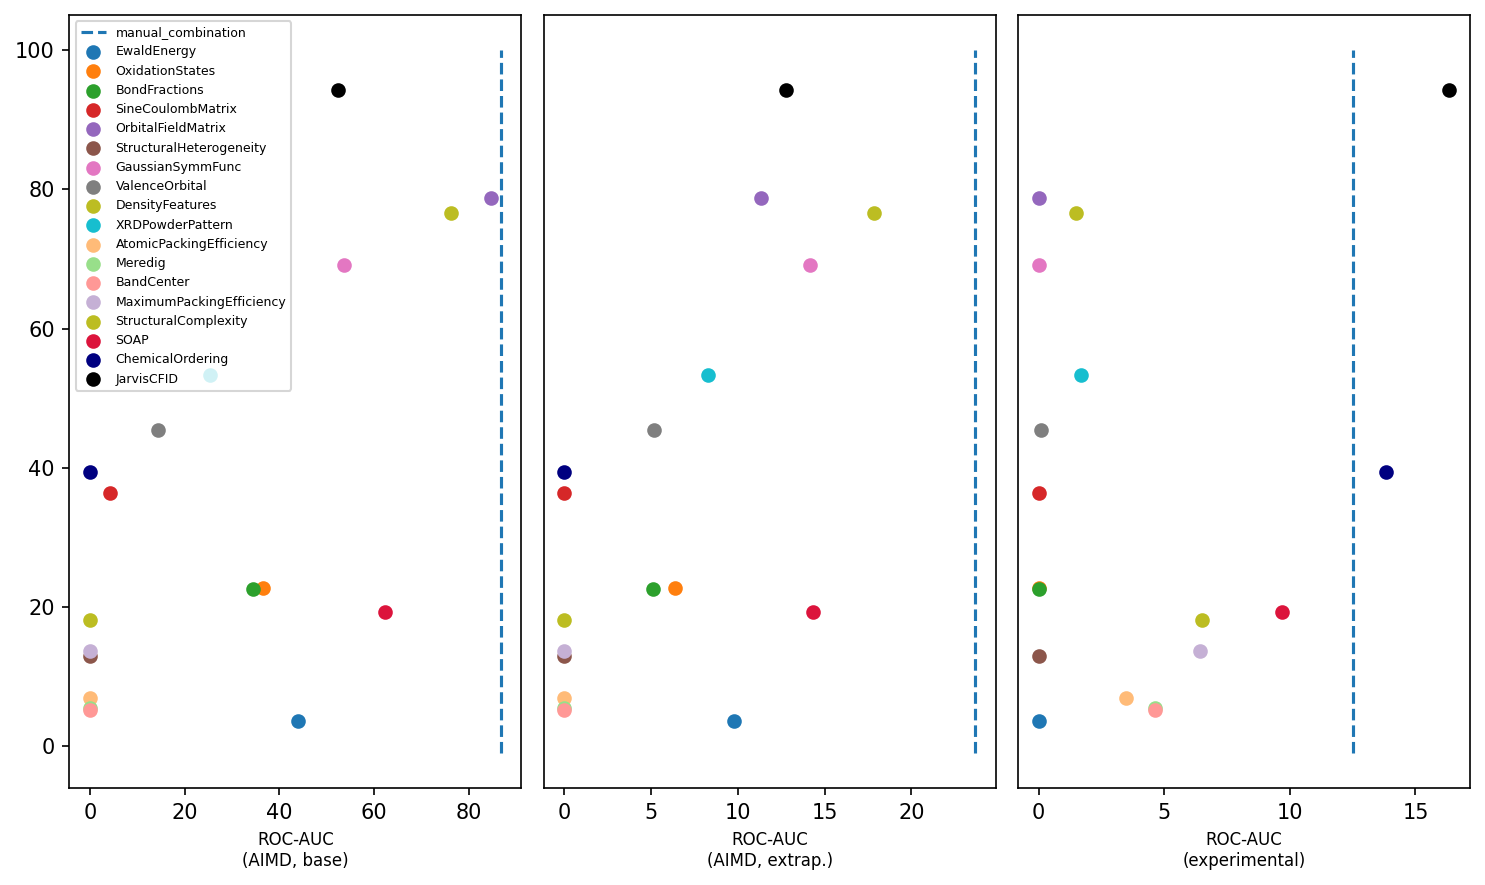

In [ ]:
# fig = plt.figure(figsize=(10, 6), dpi=150)

# for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
#     ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
#     ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
#     ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
# ], 1):
#     plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
#     plt.subplots_adjust(hspace=0.0)
#     groups = {t: g for t, g in all_features.groupby("type")}

#     g = groups['manual_combination']
#     yval = score_vals.loc[g.index].iloc[0]
#     yerr = score_errs.loc[g.index].iloc[0]
#     (l,) = plt.plot([yval] * 2, [-1.0, 100.0], '--', label='manual_combination')
            
#     for color, t in zip(colors, names):
#         if t == 'manual_combination':
#             continue
#         g = groups[t]
#         plt.scatter(
#                 x = score_vals[g.index].iloc[0], y = df_results[df_results['name'] == t]['mean_size_of_intersection'], label = g["level"].index[0], color = color
#             )
#     if i_plt == 1:
#         handles, labels = plt.gca().get_legend_handles_labels()
#         lh_dict = {l: h for l, h in zip(labels, handles)}
#         plt.legend(handles, labels, fontsize=6)
#     else:
#         frame1 = plt.gca()
#         frame1.axes.get_yaxis().set_visible(False)
#     plt.xlabel(score_type, fontsize=8)
# fig.tight_layout()
# plt.show()

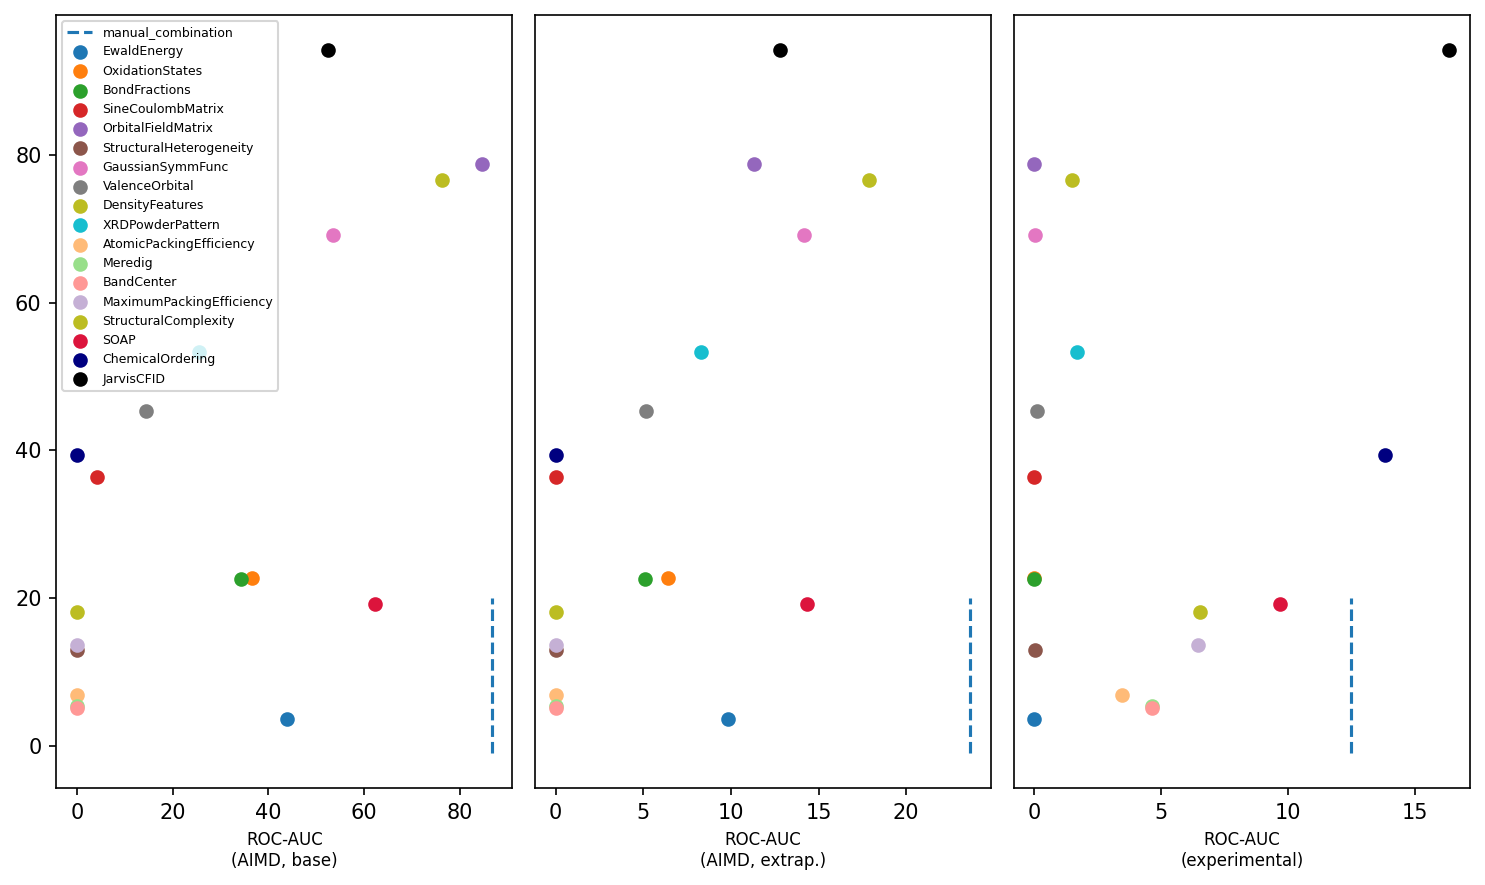

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi=150)

for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
    ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
    ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
    ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
], 1):
    plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
    plt.subplots_adjust(hspace=0.0)
    groups = {t: g for t, g in all_features.groupby("type")}

    g = groups['manual_combination']
    yval = score_vals.loc[g.index].iloc[0]
    yerr = score_errs.loc[g.index].iloc[0]
    (l,) = plt.plot([yval] * 2, [-1.0, 20.0], '--', label='manual_combination')
            
    for color, t in zip(colors, names):
        if t == 'manual_combination':
            continue
        g = groups[t]
        plt.scatter(
                x = score_vals[g.index].iloc[0], y = df_results[df_results['name'] == t]['mean_size_of_intersection'], label = g["level"].index[0], color = color
            )
    if i_plt == 1:
        handles, labels = plt.gca().get_legend_handles_labels()
        lh_dict = {l: h for l, h in zip(labels, handles)}
        plt.legend(handles, labels, fontsize=6)
    else:
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
    plt.xlabel(score_type, fontsize=8)
fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 7), dpi=150)

for i_plt, set_size in enumerate(['size of set 50', 'size of set 100', 'size of set 200',
       'size of set 500'], 1):
    print(set_size, i_plt)
    plt.subplot(2, 2, i_plt, sharex=None if i_plt == 1 else plt.gca())
    plt.subplots_adjust(hspace=0.0)
    plt.title(set_size)
    for value in featurizers_mapping.values():
        score = feature_scores_base[feature_scores_base['feature'] == value]['score'].iloc[0]
        size_of_set = df_results[df_results['sets'] == value][set_size].iloc[0]
        plt.scatter(score, size_of_set, label = value)   
    if i_plt == 1:
        handles, labels = plt.gca().get_legend_handles_labels()
        lh_dict = {l: h for l, h in zip(labels, handles)}
        plt.legend(handles, labels, fontsize=6)
    plt.ylabel('size of intersection')
    plt.xlabel('score')

fig.tight_layout()
plt.show()

In [ ]:
sigmoid = lambda x, steepness=10: 1.0 / (1.0 + np.exp(-x * steepness))

func=lambda x: (
        sigmoid(np.log10(x["fv_0p5_connected_union"]) + 2.00)
        * sigmoid(np.log10(x["fv_0p5_disconnected_union"]) + 1.15)
    )

In [ ]:
df_Kahle2020 = augment_Kahle2020.read_and_augment(
    "data_slim.csv",
)


preds_Kahle2020 = augment_preds.join_data_and_preds_Kahle2020(
    df_preds=pd.read_csv("datasets/exported.predictions.Kahle2020.v2.csv"),
    df_data=df_Kahle2020,
)


Estimating lognorm D parameters


Making initial guess:   0%|          | 0/195 [00:00<?, ?it/s]

refining:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np

mp_predictions = pd.read_csv('datasets/exported.predictions.mp.v2.csv')

In [ ]:
from pymatgen.core import Composition
from utils import load_csv

mp_oxi_states = load_csv('mp_oxi_states.pkl')
mp_oxi_states["Contains transition mentals?"] = mp_oxi_states["formula_pretty"].apply(
        lambda x: "yes" if Composition(x).contains_element_type("transition_metal") else "no"
    )


In [ ]:
sigmoid = lambda x, steepness = 10: 1.0 / (1.0 + np.exp(-x * steepness))

mp_oxi_states['manual_combination'] = mp_predictions.apply(
    lambda x: sigmoid(np.log10(x["fv_0p5_connected_union"]) + 2.00)
              * sigmoid(np.log10(x["fv_0p5_disconnected_union"]) + 1.15),
    axis=1)



In [ ]:
mp_oxi_states['material_id'].to_list() == mp_predictions['material_id'].to_list()

True

In [ ]:
datasets = featurizers_mapping.keys()
models = ['logreg_l2']
folder = 'predictions_final_single_featurizers'

result_l2 = {}

for model in models:
    for dataset in datasets:
        # print(datasets)
        if datasets == 'end_features':
            continue
        # print(f'{folder}/{dataset}_{model}_kahle.npy')
        preds_kahle = np.load(f'{folder}/{dataset}_{model}_kahle.npy', allow_pickle=True)
        preds_exp = np.load(f'{folder}/{dataset}_{model}_exp.npy', allow_pickle=True)
        preds_mpdb = np.load(f'{folder}/{dataset}_{model}_mpdb.npy', allow_pickle=True)
        mp_oxi_states[dataset] = preds_mpdb

        [preds_Kahle2020, preds_mp_exp], all_features = add_feature_np(
        [preds_Kahle2020, preds_mp_exp],
        all_features,
        values = [preds_kahle, preds_exp],
        name = f'{dataset}',
        type = f'{dataset}',
        level=0.0,
        )    
        # len_of_intersection = []
        # for n in np.linspace(1, 500, 100, dtype=int):
        #     len_of_intersection.append(len(set(np.argsort(preds_mpdb)[::-1][:n]) & set(manual_combination[:n])))
        # print(np.array(len_of_intersection).mean(), dataset)

In [ ]:
features = all_features.index.to_list()
features = [word for word in features if word.lower().startswith('barrier') == True or word.lower().startswith('fv') == True]
all_features = all_features.drop(index = features)

exp_pos = preds_mp_exp.query(
    "sigma_S_cm.replace('<1E-10', '1e-10').astype('float') >= 5e-5"
)["sample_weight"].sum()
exp_neg = preds_mp_exp.query(
    "sigma_S_cm.replace('<1E-10', '1e-10').astype('float') <= 1e-5"
)["sample_weight"].sum()


sim_pos = len(preds_Kahle2020.query("log10condNE300 >= -2.5"))
sim_pos_base = len(preds_Kahle2020.query("condNE1000 >= 0.1"))
sim_neg = len(preds_Kahle2020.query("condNE1000 <= 1e-2"))

print(f"exp          p/n: {exp_pos:.0f} / {exp_neg:.0f} = {exp_pos / exp_neg:.3f}")
print(f"sim (base)   p/n: {sim_pos_base:.0f} / {sim_neg:.0f} = {sim_pos_base / sim_neg:.3f}")
print(f"sim (extrap) p/n: {sim_pos:.0f} / {sim_neg:.0f} = {sim_pos / sim_neg:.3f}")


roclike_metrics = ROClikeComparisonMetrics()

feature_scores_experimental = roclike_metrics.eval_features(
    preds_df=preds_mp_exp,
    features_meta_info=all_features,
    positive_thr=5e-5,
    negative_thr=1e-5,
    weight_validation_plots=False,
    dataset_type="experimental",
    experimental_error_relative=1.0,
    num_bootstrap_samples=1000,
    num_negatives_max=0.1 * exp_neg,
)

feature_scores_base = roclike_metrics.eval_features(
    preds_df=preds_Kahle2020,
    features_meta_info=all_features,
    num_bootstrap_samples=1000,
    num_negatives_max=0.1 * sim_neg,
    positive_on_extrap300=False,
    weight_validation_plots=False,
)

feature_scores_extrap300 = roclike_metrics.eval_features(
    preds_df=preds_Kahle2020,
    features_meta_info=all_features,
    num_bootstrap_samples=1000,
    # num_negatives_max=2.0,
    num_negatives_max=0.1 * sim_neg,
    positive_on_extrap300=True,
    positive_thr=-2.5,
    weight_validation_plots=False,
)


exp          p/n: 6 / 76 = 0.079
sim (base)   p/n: 31 / 64 = 0.484
sim (extrap) p/n: 4 / 64 = 0.062
Found sample weights!


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
mp_no_transition_metals = mp_oxi_states[mp_oxi_states['Contains transition mentals?'] == 'no']

In [ ]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Yellow-green
    "#17becf",  # Cyan
    "#ffbb78",  # Light Orange
    "#98df8a",  # Light Green
    "#ff9896",  # Light Red
    "#c5b0d5",  # Light Purple
    'tab:olive',
    'crimson',
    'peru',
    'navy',
    'black'
]

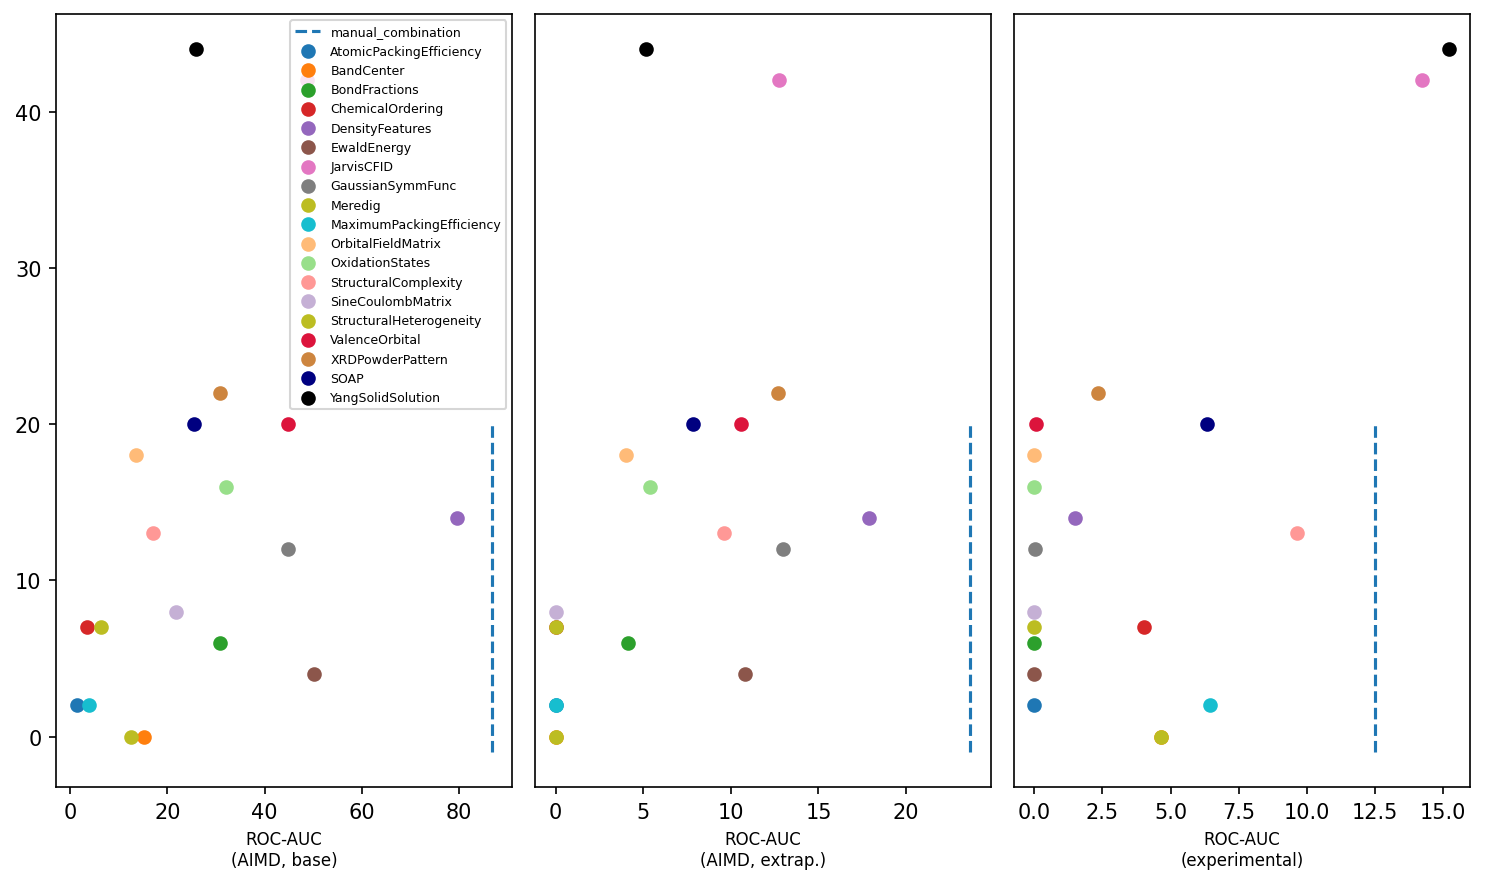

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi=150)

for i_plt, (score_type, score_features, score_vals, score_errs) in enumerate([
    ("ROC-AUC\n(AIMD, base)", feature_scores_base.index, feature_scores_base["score"], (feature_scores_base["score_bs_q84"] - feature_scores_base["score_bs_q16"]) / 2),
    ("ROC-AUC\n(AIMD, extrap.)", feature_scores_extrap300.index, feature_scores_extrap300["score"], (feature_scores_extrap300["score_bs_q84"] - feature_scores_extrap300["score_bs_q16"]) / 2),
    ("ROC-AUC\n(experimental)", feature_scores_experimental.index, feature_scores_experimental["score"], (feature_scores_experimental["score_bs_q84"] - feature_scores_experimental["score_bs_q16"]) / 2),
], 1):
    plt.subplot(1, 3, i_plt, sharey=None if i_plt == 1 else plt.gca())
    plt.subplots_adjust(hspace=0.0)
    groups = {t: g for t, g in all_features.groupby("type")}

    g = groups['manual_combination']
    yval = score_vals.loc[g.index].iloc[0]
    yerr = score_errs.loc[g.index].iloc[0]
    (l,) = plt.plot([yval] * 2, [-1.0, 20.0], '--', label='manual_combination')
    
    for color, t in zip(colors, datasets):
        if t == 'manual_combination':
            continue
        g = groups[t]
        lenn_of_intesection = []
        for n in np.linspace(1, 500, 100):
            lenn_of_intesection.append(len(set(np.argsort(mp_no_transition_metals['manual_combination'].to_numpy())[::-1][:100]) & set(np.argsort(mp_no_transition_metals[t].to_numpy())[::-1][:100])))
        
        plt.scatter(
                x = score_vals[g.index].iloc[0], y = np.array(lenn_of_intesection).mean(), label = featurizers_mapping[g["level"].index[0]], color = color
            )
        
    if i_plt == 1:
        handles, labels = plt.gca().get_legend_handles_labels()
        lh_dict = {l: h for l, h in zip(labels, handles)}
        plt.legend(handles, labels, fontsize=6)
    else:
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
    plt.xlabel(score_type, fontsize=8)
fig.tight_layout()
plt.show()